# Feature Selection

There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable.

They are:

- Correlation Statistics.
- Mutual Information Statistics

**The scikit-learn machine library provides an implementation of the correlation statistic in the *f_regression()* function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the *SelectKBest* class.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data/variables.csv')

X = df.drop('maximum_range',axis=1)
y = df['maximum_range']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   alt_sht        9 non-null      float64
 1   vel_sht        9 non-null      float64
 2   pit_sht        9 non-null      float64
 3   alt_tgt        9 non-null      float64
 4   vel_tgt        9 non-null      float64
 5   hdg_tgt        9 non-null      float64
 6   rgt_tgt        9 non-null      float64
 7   maximum_range  9 non-null      float64
dtypes: float64(8)
memory usage: 704.0 bytes


## Correlation Feature Selection

Correlation is a measure of how two variables change together. Perhaps the most common correlation measure is Pearson’s correlation that assumes a Gaussian distribution to each variable and reports on their linear relationship.

Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values.

In [4]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# creating a dictionary to save the scores
dic = {}    
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: alt_sht 0.735590
Feature 2: vel_sht 2.150380
Feature 3: pit_sht 0.762935
Feature 4: alt_tgt 0.004325
Feature 5: vel_tgt 0.067263
Feature 6: hdg_tgt 0.920699
Feature 7: rgt_tgt 1.529596


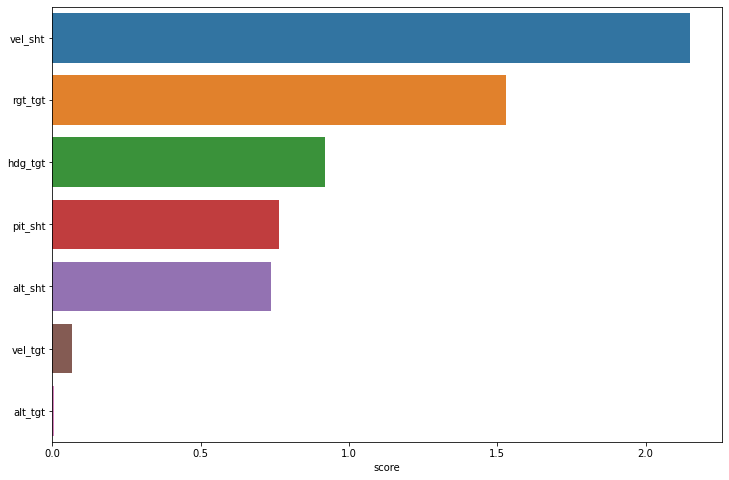

In [5]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x=scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

## Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, it can be adapted for use with numerical input and output data.

**The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the *mutual_info_regression()* function.**

In [6]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# creating a dictionary to save the scores
dic = {}    
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: alt_sht 0.000000
Feature 2: vel_sht 0.088889
Feature 3: pit_sht 0.033333
Feature 4: alt_tgt 0.000000
Feature 5: vel_tgt 0.000000
Feature 6: hdg_tgt 0.055556
Feature 7: rgt_tgt 0.033333


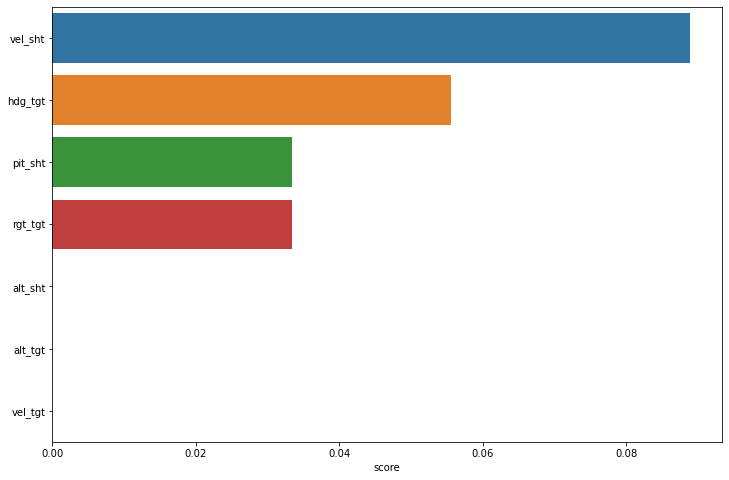

In [7]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x=scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

Compared to the correlation feature selection method we can clearly see many more features scored as being relevant. This may be because of the statistical noise that we added to the dataset in its construction.

## Modeling With Selected Features

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use?

A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

### Model Built Using All Features

As a first step, we will evaluate a LinearRegression model using all the available features.

The model is fit on the training dataset and evaluated on the test dataset.

In [8]:


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 52.583


### Model Built Using Correlation Features

In [10]:
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

for k in range(X_train.shape[1]):
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, k+1)
    # fit the model
    model = LinearRegression()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    print(f'MAE with the {k+1} most important features: {mae:.3f}')

MAE with the 1 most important features: 18.819
MAE with the 2 most important features: 17.822
MAE with the 3 most important features: 17.344
MAE with the 4 most important features: 24.422
MAE with the 5 most important features: 53.559
MAE with the 6 most important features: 57.611
MAE with the 7 most important features: 52.583


### Model Built Using Mutual Information Features

In [74]:
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

for k in range(X_train.shape[1]):
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, k+1)
    # fit the model
    model = LinearRegression()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    print(f'MAE with the {k+1} most important features: {mae:.3f}')

MAE with the 1 most important features: 7.099
MAE with the 2 most important features: 7.152
MAE with the 3 most important features: 7.251
MAE with the 4 most important features: 7.125
MAE with the 5 most important features: 7.176
MAE with the 6 most important features: 7.232
MAE with the 7 most important features: 7.188


### Tune the Number of Selected Features

Instead of guessing, we can systematically test a range of different numbers of selected features and discover which results in the best performing model. This is called a grid search, where the k argument to the SelectKBest class can be tuned.

It is a good practice to evaluate model configurations on regression tasks using repeated stratified k-fold cross-validation. We will use three repeats of 10-fold cross-validation via the *RepeatedKFold* class.

We can define a Pipeline that correctly prepares the feature selection transform on the training set and applies it to the train set and test set for each fold of the cross-validation.

In this case, we will use the mutual information statistical method for selecting features.

In this case, we will evaluate models using the negative mean absolute error (neg_mean_absolute_error). It is negative because the scikit-learn requires the score to be maximized, so the MAE is made negative, meaning scores scale from -infinity to 0 (best).

In [12]:
# define number of features to evaluate
num_features = [i for i in range(1, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
    # create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # evaluate the model
    cv = RepeatedKFold(n_splits=9, n_repeats=3, random_state=101)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

>1 -10.734 (8.214)
>2 -11.462 (7.980)
>3 -11.762 (8.520)
>4 -15.640 (9.148)
>5 -25.338 (17.233)
>6 -38.186 (20.853)
>7 -237.868 (311.420)


Box and whisker plots are created side by side showing the trend of k vs. MAE where the green triangle represents the mean and orange line represents the median of the distribution.

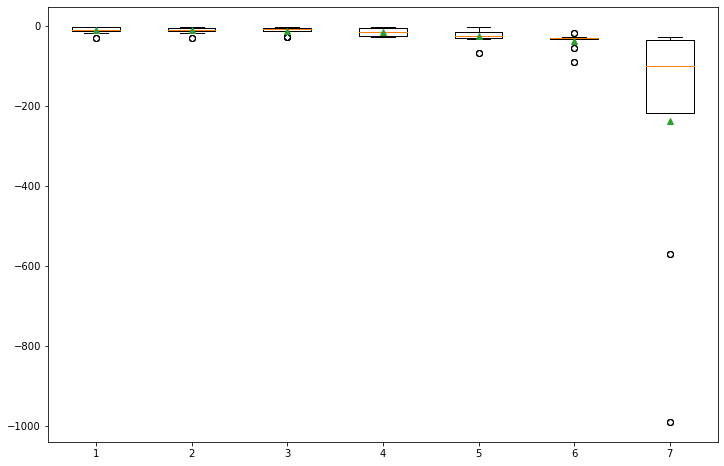

In [13]:
# plot model performance for comparison
plt.figure(figsize=(12,8))
plt.boxplot(results, labels=num_features, showmeans=True);

#### Source
https://machinelearningmastery.com/feature-selection-for-regression-data/